# Incident Management - Quality Analytics
## Incident Closure Checking

Version: Draft

File: IM-QA-ICC_v.draft.ipynb

In [1]:
# Library Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from win32com.client import Dispatch
import base64
from datetime import datetime 
import os


In [2]:
# Load the dataset from a CSV file.
df_sideA = pd.read_csv(r'C:/DevProjects/DHL/IM_DataAnalysisReport/src/data/incident_QA_Side-A.csv')
df_sideB = pd.read_csv(r'C:/DevProjects/DHL/IM_DataAnalysisReport/src/data/incident_QA_Side-B.csv')


In [3]:
# Print the list of columns in the dataframe
print(f'incident_QA_Side-A \n Lista de Colunas com tipos: \n {df_sideA.dtypes}')

incident_QA_Side-A 
 Lista de Colunas com tipos: 
 number                          object
caller_id                       object
u_incident_type                 object
impact                          object
short_description               object
u_impacted_area                 object
u_impacted_business_unit        object
assignment_group                object
assigned_to                     object
assigned_to.email               object
assigned_to.manager             object
assigned_to.manager.email       object
u_site                          object
u_reporting_level               object
incident_state                  object
u_service                       object
u_resolution_sla.percentage    float64
u_sla_contract                  object
opened_at                       object
u_accepted_at                   object
sys_updated_on                  object
u_target_resolution_time        object
cmdb_ci                         object
cmdb_ci.u_folder                object
cmdb_ci.categ

In [4]:
# Print the list of columns in the dataframe
print(f'incident_QA_Side-B \n Lista de Colunas com tipos: \n {df_sideB.dtypes}')


incident_QA_Side-B 
 Lista de Colunas com tipos: 
 number                         object
caller_id                      object
u_incident_type                object
impact                         object
short_description              object
u_impacted_area                object
u_impacted_business_unit       object
assignment_group               object
assigned_to                    object
assigned_to.email              object
assigned_to.manager            object
assigned_to.manager.email      object
u_site                         object
u_reporting_level              object
incident_state                 object
u_service                      object
u_resolution_sla.percentage    object
u_sla_contract                 object
opened_at                      object
u_accepted_at                  object
sys_updated_on                 object
u_target_resolution_time       object
cmdb_ci                        object
cmdb_ci.u_folder               object
cmdb_ci.category               object

In [ ]:
# Processing the dataset to convert columns to appropriate data types
def pre_process_dataset(df_processing):
    """ 
    Pre-process the dataset by converting columns to appropriate data types. 
    """
    date_formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M', '%Y-%m-%d', '%d-%b-%Y']

    for column in df_processing.columns:
        if df_processing[column].dtype == 'object':
            if pd.to_numeric(df_processing[column], errors='coerce').notnull().all():
                df_processing[column] = pd.to_numeric(df_processing[column])
            else:
                for date_format in date_formats:
                    try:
                        df_processing[column] = pd.to_datetime(df_processing[column], format=date_format, errors='raise')
                        break
                    except ValueError:
                        continue
        elif df_processing[column].dtype == 'float64':
            continue
        elif df_processing[column].dtype == 'int64':
            df_processing[column] = df_processing[column].astype('int64')
        elif df_processing[column].dtype == 'bool':
            df_processing[column] = df_processing[column].astype('bool')
        elif pd.api.types.is_datetime64_any_dtype(df_processing[column]):
            for date_format in date_formats:
                try:
                    df_processing[column] = pd.to_datetime(df_processing[column], format=date_format, errors='raise')
                    break
                except ValueError:
                    continue
        else:
            df_processing[column] = df_processing[column].astype('object')

    return df_processing

# Apply the pre-processing function to the dataframe
#df = pre_process_dataset(df_sideA)

df_sideA = pre_process_dataset(df_sideA)
df_sideB = pre_process_dataset(df_sideB)


In [8]:
# Print the list of columns in the dataframe
print(f'incident_QA_Side-A \n Lista de Colunas com tipos:\n{df_sideA.dtypes}')

Lista de Colunas com tipos:
number                                 object
caller_id                              object
u_incident_type                        object
impact                                 object
short_description                      object
u_impacted_area                        object
u_impacted_business_unit               object
assignment_group                       object
assigned_to                            object
assigned_to.email                      object
assigned_to.manager                    object
assigned_to.manager.email              object
u_site                                 object
u_reporting_level                      object
incident_state                         object
u_service                              object
u_resolution_sla.percentage           float64
u_sla_contract                         object
opened_at                      datetime64[ns]
u_accepted_at                  datetime64[ns]
sys_updated_on                 datetime64[ns]
u_targ

In [ ]:
# Clean up the dataset by converting columns to appropriate data types.
def cleanup_dataset(df_processing):
    """ 
    Clean up the dataset by converting columns to appropriate data types. 
    """
    df_data_proc = df_processing
    
    # The .ffill method is used in pandas to fill in missing values (NaN) in a DataFrame or Series.
    # It performs a forward fill, i.e. it fills the missing values with the last non-missing value previously found in the same column.
    #.ffill() or method='ffill' for forward fill (fill with the previous value).
    #.bfill() or method='bfill' for backward fill (fill with the next value).
    # Example of use:
    #                df_data_proc.ffill(inplace=True) or df_data_proc.bfill(inplace=True) 
    #                df_data_proc..fillna(method='ffill',inplace=True) or df_data_proc..fillna(method='bfill',inplace=True)

    # Remove duplicated records
    # df_data_proc.drop_duplicates(inplace=True)

    # Removes records with null values or missing
    # df_data_proc.dropna(inplace=True)
 
    # Fill missing values with appropriate strategies
    # For numeric columns, fill with the mean
    # Example of use:
    #       numeric_cols = df_data_proc.select_dtypes(include=['float64', 'int64']).columns
    #       df_data_proc[numeric_cols] = df_data_proc[numeric_cols].fillna(df_data_proc[numeric_cols].mean())

    # For categorical columns, fill with the mode
    # Example of use:
    #       categorical_cols = df_data_proc.select_dtypes(include=['object']).columns
    #       df_data_proc[categorical_cols] = df_data_proc[categorical_cols].fillna(df_data_proc[categorical_cols].mode().iloc[0])

    # For categorical columns, fill with a specific value
    categorical_cols = df_data_proc.select_dtypes(include=['object']).columns
    df_data_proc[categorical_cols] = df_data_proc[categorical_cols].fillna('(empty)')

    # For datetime columns, fill with the most recent date
    # Example of use:
    #       datetime_cols = df_data_proc.select_dtypes(include=['datetime64']).columns
    #       df_data_proc[datetime_cols] = df_data_proc[datetime_cols].fillna(df_data_proc[datetime_cols].max())
    
    
    return df_data_proc

# Clean up the dataset
df = cleanup_dataset(df)


In [9]:
# Print the list of columns in the dataframe
print(f'incident_QA_Side-B \n Lista de Colunas com tipos:\n{df_sideB.dtypes}')


incident_QA_Side-B 
 Lista de Colunas com tipos:
number                         int64
caller_id                      int64
u_incident_type                int64
impact                         int64
short_description              int64
u_impacted_area                int64
u_impacted_business_unit       int64
assignment_group               int64
assigned_to                    int64
assigned_to.email              int64
assigned_to.manager            int64
assigned_to.manager.email      int64
u_site                         int64
u_reporting_level              int64
incident_state                 int64
u_service                      int64
u_resolution_sla.percentage    int64
u_sla_contract                 int64
opened_at                      int64
u_accepted_at                  int64
sys_updated_on                 int64
u_target_resolution_time       int64
cmdb_ci                        int64
cmdb_ci.u_folder               int64
cmdb_ci.category               int64
cmdb_ci.vendor            

In [10]:
# Print the list of columns in the dataframe
#print(f'Lista de Colunas com tipos:\n{df.dtypes.tolist()}')
print(f'Lista de Colunas com tipos:\n{df_sideA.dtypes}')
print(f'Lista de Colunas com tipos:\n{df_sideB.dtypes}')


Lista de Colunas com tipos:
number                                 object
caller_id                              object
u_incident_type                        object
impact                                 object
short_description                      object
u_impacted_area                        object
u_impacted_business_unit               object
assignment_group                       object
assigned_to                            object
assigned_to.email                      object
assigned_to.manager                    object
assigned_to.manager.email              object
u_site                                 object
u_reporting_level                      object
incident_state                         object
u_service                              object
u_resolution_sla.percentage           float64
u_sla_contract                         object
opened_at                      datetime64[ns]
u_accepted_at                  datetime64[ns]
sys_updated_on                 datetime64[ns]
u_targ

In [12]:
# Rename the columns in the dataframe
##  df.rename(columns={
##      'number'                                : 'Number',
##      'caller_id'                             : 'Caller',
##      'u_incident_type'                       : 'Incident_Type',
##      'impact'                                : 'Impact',
##      'short_description'                     : 'Short_Description',
##      'u_impacted_area'                       : 'Area',
##      'u_impacted_business_unit'              : 'BU',
##      'assignment_group'                      : 'Assignment_Group',
##      'assignment_group.manager.email'        : 'AG_Manager_Email',
##      'assigned_to'                           : 'Assigned',
##      'assigned_to.email'                     : 'Assigned_Email',
##      'u_site'                                : 'Site',
##      'u_reporting_level'                     : 'Level',
##      'incident_state'                        : 'Incident_State',
##      'u_service'                             : 'Service',
##      'u_service.u_accountmanager.email'      : 'Service_AccountManager_Email',
##      'u_service.owned_by.email'              : 'Service_OwnedByEmail',
##      'u_resolution_sla.percentage'           : 'SLA',
##      'opened_at'                             : 'Opened',
##      'u_accepted_at'                         : 'Accepted',
##      'sys_updated_on'                        : 'Updated',
##      'u_target_resolution_time'              : 'TRT',
##      'u_supplier'                            : 'Supplier',
##      'cmdb_ci'                               : 'CI_CMDB',
##      'cmdb_ci.category'                      : 'CI_Category',
##      'cmdb_ci.u_folder'                      : 'CI_Folder',
##      'cmdb_ci.manufacturer'                  : 'CI_Manufacturer',
##      'cmdb_ci.model_id'                      : 'CI_Model_ID',
##      'cmdb_ci.model_number'                  : 'CI_Model_Number',
##      'cmdb_ci.serial_number'                 : 'CI_Serial_Number',
##      'cmdb_ci.asset_tag'                     : 'CI_Asset_Tag',
##      'u_complaint_reason'                    : 'Complaint_Reason',
##      'reassignment_count'                    : 'Reassignment_Count',
##      'u_reassign_reason'                     : 'Reassign_Reason',
##      'reopen_count'                          : 'Reopen_Count',
##      'u_date_worked'                         : 'Date_Worked',
##      'u_effort_service'                      : 'Effort_Service',
##      'u_time_worked_total'                   : 'Time_Worked_Total',
##      'u_resolution_sla.duration'             : 'SLA_Duration',
##      'u_resolution_sla.business_percentage'  : 'SLA_Business_Percentage',
##  }, inplace=True)



In [13]:
# Data Calculate

def date_calculate(df_processing):
    """
    Calculate the difference between the date of the incident and the date of the report.
    """
    df_data_proc = df_processing

    # Force convert datetime columns to datetime data type
    #df_data_proc['Opened']  = pd.to_datetime(df_data_proc['Opened'])
    #df_data_proc['Updated'] = pd.to_datetime(df_data_proc['Updated'])
    #df_data_proc['TRT']     = pd.to_datetime(df_data_proc['TRT'])

    # Get the current date
    now = datetime.now()

    # Calculate the difference between the date of the incident and the date of the report
    df_data_proc['Days_Since_Opened']   = (now - df_data_proc['Opened']).dt.days
    df_data_proc['Days_Since_Updated']  = (now - df_data_proc['Updated']).dt.days
    df_data_proc['Days_Until_TRT']      = (df_data_proc['TRT'] - now).dt.days

    return df_processing

# Apply the date calculation function to the dataframe
#df = date_calculate(df)


In [14]:
# Test Now()
now = datetime.now()
print(f'Current Date: {now}')

Current Date: 2025-08-13 21:20:46.305399


In [16]:
# pritn the list of columns in the dataframe
print(df_sideA.columns.tolist())

['number', 'caller_id', 'u_incident_type', 'impact', 'short_description', 'u_impacted_area', 'u_impacted_business_unit', 'assignment_group', 'assigned_to', 'assigned_to.email', 'assigned_to.manager', 'assigned_to.manager.email', 'u_site', 'u_reporting_level', 'incident_state', 'u_service', 'u_resolution_sla.percentage', 'u_sla_contract', 'opened_at', 'u_accepted_at', 'sys_updated_on', 'u_target_resolution_time', 'cmdb_ci', 'cmdb_ci.u_folder', 'cmdb_ci.category', 'cmdb_ci.vendor', 'cmdb_ci.model_id', 'cmdb_ci.serial_number', 'close_code', 'close_notes', 'reopen_count', 'u_spl_closure_code', 'reassignment_count', 'u_reassign_reason', 'u_vendors']


In [ ]:
# customising_order_of_columns(df, 'incident_view')

def customising_order_of_columns(df_processing, format_view):
    """ Format the columns list according to the view selected. """

    if format_view == None:
        columns_list = df_processing[df_processing.columns.tolist()].copy()

    elif format_view == "incident_view":
        columns_list = df_processing[['Number', 'Opened', 'Service', 'Area', 'BU', 'Caller', 'Assignment_Group', 'Assigned', 'Incident_Type', 'Impact', 'Updated']].copy()

    elif format_view == "incident_type_impact_view":
        columns_list = df_processing[['Number', 'Opened', 'Incident_Type', 'Impact', 'Area', 'BU', 'Caller', 'Service', 'Assignment_Group', 'Assigned', 'Updated']].copy()

    elif format_view == "ci_view":
        columns_list = df_processing[['Number', 'Opened', 'Incident_Type', 'Impact', 'Area', 'BU', 'Caller', 'Service', 'Assigned', 'CI_CMDB', 'Updated']].copy()

    elif format_view == "supplier_view":
        columns_list = df_processing[['Number', 'Opened', 'Incident_Type', 'Impact', 'Area', 'BU', 'Service', 'Incident_State', 'Supplier', 'CI_CMDB', 'CI_Category', 'CI_Folder', 'CI_Model_ID','Updated']].copy()

    elif format_view == "impact_view":
        columns_list = df_processing[['Number', 'Opened', 'Service', 'Area', 'BU', 'Caller', 'Assignment_Group', 'Assigned', 'Incident_Type', 'Impact', 'Updated']].copy()

    return columns_list


In [ ]:
# convert_category_data_to_discrete_data(df)

def convert_category_data_to_discrete_data(df_processing):
    """
    Converts categorical data to discrete data by applying factorization.
    Returns:
    None
    """
    df_data_proc = df_processing.copy()
    #df_data_proc['incident_state_disc'], uniques   = pd.factorize(df_data_proc['Incident_State'])
    #df_data_proc['caller_disc'], uniques           = pd.factorize(df_data_proc['Caller'])
    #df_data_proc['site_disc'], uniques             = pd.factorize(df_data_proc['Site'])
    #df_data_proc['assignment_group_disc'], uniques = pd.factorize(df_data_proc['Assignment_Group'])
    #df_data_proc['incident_type_disc'], uniques    = pd.factorize(df_data_proc['Incident_Type'])
    #df_data_proc['impact_disc'], uniques           = pd.factorize(df_data_proc['Impact'])
    #df_data_proc['bu_disc'], uniques               = pd.factorize(df_data_proc['BU'])
    #df_data_proc['supplier_disc'], uniques         = pd.factorize(df_data_proc['Supplier'])    
    return df_data_proc

#df_describe = convert_category_data_to_discrete_data(df)



In [17]:
print(df_sideA.dtypes)

number                                 object
caller_id                              object
u_incident_type                        object
impact                                 object
short_description                      object
u_impacted_area                        object
u_impacted_business_unit               object
assignment_group                       object
assigned_to                            object
assigned_to.email                      object
assigned_to.manager                    object
assigned_to.manager.email              object
u_site                                 object
u_reporting_level                      object
incident_state                         object
u_service                              object
u_resolution_sla.percentage           float64
u_sla_contract                         object
opened_at                      datetime64[ns]
u_accepted_at                  datetime64[ns]
sys_updated_on                 datetime64[ns]
u_target_resolution_time       dat

### 1.0 - Heatmap for correlation analysis between Incident Types and Impact

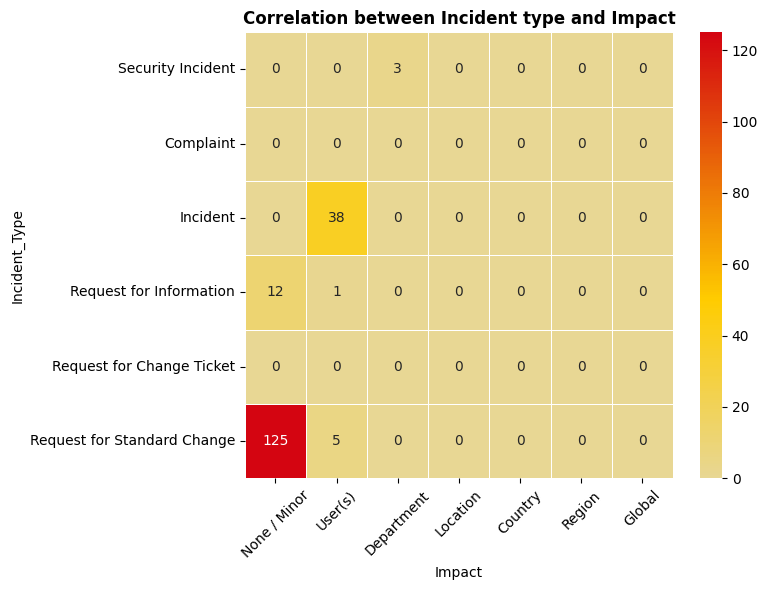

In [28]:
# 1.0 - Heatmap for correlation analysis between Incident Types and Impact

label_incident_type_order = ['Security Incident','Complaint','Incident', 'Request for Information','Request for Change Ticket','Request for Standard Change']
label_impact_order = ['None / Minor', 'User(s)','Department','Location','Country','Region','Global']

cmap = LinearSegmentedColormap.from_list("custom_cmap",["#DCDCDC", "#FFCC00", "#D40511"])

matrix_incident_type_w_impact = pd.crosstab(df_sideA['u_incident_type'], df_sideA['impact']).reindex(index=label_incident_type_order, columns=label_impact_order, fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_incident_type_w_impact, annot=True, cmap=cmap, center=50, linewidths=0.5, fmt=".0f")    
plt.title('Correlation between Incident type and Impact').set_weight('bold')
plt.xlabel('Impact').set_animated(True)
plt.ylabel('Incident_Type')
plt.xticks(rotation=45)
plt.tight_layout()
    
#plt.savefig('./src/output/html_element_1_0.png', dpi=150)
plt.show()


In [32]:
# 1.1 - Report listing the incident type filtered as "Incident" and the impact filtered as "None / Minor".

df_1_1 = df_sideA[(df_sideA['u_incident_type'] == 'Incident') & (df_sideA['impact'] == 'None / Minor')].sort_values(by=['u_impacted_area', 'u_impacted_business_unit', 'assignment_group', 'assigned_to'])
#df_1_1 = customising_order_of_columns(df_1_1, 'incident_type_impact_view')
df_1_1.head(20) #.to_html('./src/output/html_element_1_1.html', index=False)



,number,caller_id,u_incident_type,impact,short_description,u_impacted_area,u_impacted_business_unit,assignment_group,assigned_to,assigned_to.email,...,cmdb_ci.vendor,cmdb_ci.model_id,cmdb_ci.serial_number,close_code,close_notes,reopen_count,u_spl_closure_code,reassignment_count,u_reassign_reason,u_vendors


In [33]:
# 1.2 - Report listing the incident type filtered as "Request for ..." and the impact filtered as different of "None / Minor"

df_1_2 = df_sideA[(df_sideA['u_incident_type'].str.startswith("Request for", na=False)) & (df_sideA['impact'] != "None / Minor")].sort_values(by=['u_impacted_area', 'u_impacted_business_unit', 'assignment_group', 'assigned_to'])
#df_1_2 = customising_order_of_columns(df_1_2, 'incident_type_impact_view') 
df_1_2.head(20) #.to_html('./src/output/html_element_1_2.html', index=False)



,number,caller_id,u_incident_type,impact,short_description,u_impacted_area,u_impacted_business_unit,assignment_group,assigned_to,assigned_to.email,...,cmdb_ci.vendor,cmdb_ci.model_id,cmdb_ci.serial_number,close_code,close_notes,reopen_count,u_spl_closure_code,reassignment_count,u_reassign_reason,u_vendors
3,INC65084862,Wagner Rodrigues Dos Santos,Request for Standard Change,User(s),BR DSC RF Não é possível acessar a velocidade,BR,DSC,AMER-ITS-SA-Scanner,Alexsandro Paulino De Oliveira,alexsandro.oliveira@dhl.com,...,NaN,Honeywell CK65,21061D83DB,Not Resolved (Withdrawn by User),"Tentado contato com colaborador(a), porém sem ...",0,AMER-TM-Android_RF,1,NaN,NaN
10,INC65073690,Daniel Pelissen Pavani Soares,Request for Standard Change,User(s),BR DSC Cajamar RF problema com o scanner,BR,DSC,AMER-ITS-SA-Scanner,Carlos Alberto Montana,carlos.montana@dhl.com,...,NaN,Honeywell CK65,24012D8079,Not Resolved (Withdrawn by User),Orientado colaborador sobre o uso e criação do...,0,AMER-TM-Telnet,1,NaN,NaN
172,INC65161597,Sergio Jose Ribeiro Junior,Request for Standard Change,User(s),BR - ITS - Máquina desabilitada no AD.,BR,Express,AMER-ITS-BR-FieldSupport,Sergio Jose Ribeiro Junior,s.ribeiro_junior@dhl.com,...,Dell,Dell Latitude 5420,HTGMLM3,Resolved,Onsite _ Visto que a máquina estava fora do do...,0,AMER-SW-NonStdApplications_Installation,1,NaN,NaN
115,INC65073423,Eiji Moreira Yamamoto,Request for Information,User(s),Secure Boot is disabled on multiple workstations,BR,ITS,AMER-ITS-BR-EUS-BRAZIL,Luiz Lourenco Pereira Neto,Luiz.Lourenco@dhl.com,...,NaN,NaN,NaN,Not Resolved (Conflicts with Standards and Pol...,A equipe de segurança da informação recebeu ti...,0,AMER-HW-Motherboard,1,NaN,NaN
80,INC65061702,Lih Lih Ng,Request for Standard Change,User(s),AR/DSC- Secure Boot is disabled on multiple wo...,MY - Malaysia,ITS,AMER-ITS-AR-EUS-Argentina,Gustavo Jorge Estrella,Gustavo.Estrella@dhl.com,...,NaN,NaN,NaN,Resolved,Secureboot activo en ambos equipos de acuerdo ...,0,AMER-EUS-Unknown,1,NaN,NaN
25,INC65062003,Lih Lih Ng,Request for Standard Change,User(s),CL/DSC-Secure Boot is disabled on CLQUIWD3011104,MY - Malaysia,ITS,AMER-ITS-CL-EUS-Chile,Cristian Escobar Olguin,cristian.escobar@dhl.com,...,NaN,HP Elite SFF 600 G9,MXL4113JCY,Resolved,Security Boot no fue desactivado por usuario.\...,0,AMER-OT-BIOS_UPDATE,1,NaN,NaN


### 2.0 - Heatmap for correlation analysis between Impacted Service and Impacted BU

In [ ]:
# 2.0 - Heatmap for correlation analysis between Impacted Service and Impacted BU.
cmap = LinearSegmentedColormap.from_list("custom_cmap",["#DCDCDC", "#D40511"])
cross_tab = pd.crosstab(df['Service'], df['BU'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap=cmap, center=30, linewidths=0.5, fmt=".0f")
plt.title('Impacted Service vs Impacted BU - Heatmap')
plt.xlabel('Impacted BU').set_animated(True)
plt.ylabel('Impacted Service')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('./src/output/html_element_2_0.png', dpi=150)
plt.show()

In [25]:
# 2.1 - Report that lists the incidents in which the Service does not contain the word "...LATAM".

df_2_1 = df[~df['Service'].str.contains(" LATAM", regex=False, na=False)].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
#df_2_1 = customising_order_of_columns(df_2_1, 'incident_type_impact_view')

df_2_1.head(20) #.to_html('./src/output/html_element_2_1.html', index=False)   



NameError: name 'df' is not defined

In [ ]:
# 2.2 - Report that lists the incidents in which the Service is "DESKTOP SUPPORT DSC LATAM" and the BU is different from "DSC".

df_2_2 = df[(df['Service'] == "DESKTOP SUPPORT DSC LATAM") & (df['BU'] != "DSC")].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_2_2 = customising_order_of_columns(df_2_2, 'incident_type_impact_view')
df_2_2.head(20) #.to_html('./src/output/html_element_2_2.html', index=False)   




In [ ]:
# 2.3 - Report that lists the incidents in which the Service is "DESKTOP SUPPORT EXP LATAM" and the BU is different from "Express".

df_2_3 = df[(df['Service'] == "DESKTOP SUPPORT EXP LATAM") & (df['BU'] != "Express")].sort_values(by=['Area', 'BU', 'Assignment_Group', 'Assigned'])
df_2_3 = customising_order_of_columns(df_2_3, 'incident_type_impact_view')
df_2_3.head(20) #.to_html('./src/output/html_element_2_3.html', index=False)   


### 3.0 - Heatmap for correlation analysis between Assigned Group and Impacted Service

In [ ]:
# 3.0 - Heatmap for correlation analysis between Assigned Group and Impacted Service

cmap = LinearSegmentedColormap.from_list("custom_cmap",[ '#EBEBEB', '#DCDCDC', '#FFCC00'])

grouped_data = df.groupby(['Service', 'Assignment_Group']).size().unstack(fill_value=0)
grouped_data = grouped_data.sort_values(by='Service', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, cmap=cmap, center=10, linewidths=0.5, fmt=".0f")

plt.title('Heatmap of Assigned Group VS Impacted Service').set_weight('bold')
plt.xlabel('Assigned Group', labelpad=10)
plt.ylabel('Impacted Service', labelpad=10).set_animated(True)
plt.xticks(rotation=45)
plt.tight_layout()

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_horizontalalignment('right')
    tick.set_x(tick.get_position()[0] - 1)

#plt.savefig('./src/output/html_element_3_0.png', dpi=150)
plt.show()

In [ ]:
# 3.1 - Report listing the number of incidents by Area, BU and Assigned Group

df_3_1 = df.groupby(['Area', 'BU', 'Assigned']).agg(Number_Count=('Number', 'count')).reset_index()
df_3_1.index = df_3_1.index + 1
df_3_1 = df_3_1.sort_values(['Area', 'Assigned', 'BU'])
df_3_1.head(len(df)) #.to_html('./src/output/html_element_3_1.html')




In [ ]:
# 3.2 - Report listing the number of incidents by Area, BU and Assignment_Group 

df_3_2 = df.groupby(['Area', 'BU', 'Assignment_Group']).agg(Number_Count=('Number', 'count')).reset_index()
df_3_2.index = df_3_2.index + 1
df_3_2 = df_3_2.sort_values(['Area', 'Assignment_Group', 'BU'])
df_3_2.head(len(df)) #.to_html('./src/output/html_element_3_2.html')


### 4.0 - The field "Configuration Item" as Null value or "NoRecord". 

In [ ]:
# 4.0 - The Configuration Item field as ‘(empty)’, ‘NoRecord’ or other value.. 

df['CI_CMDB_Status'] = df['CI_CMDB'].apply(lambda x: 'NoRecord' if x == 'NORECORD' else ('(empty)' if x == '(empty)' else 'Others'))
config_item_counts = df['CI_CMDB_Status'].value_counts()
custom_colors = ['#FFCC00', '#AFAFAF', '#D40511'] 
plt.figure(figsize=(8, 6))
sns.barplot(x=config_item_counts.index, y=config_item_counts.values, hue=config_item_counts.index, palette=custom_colors, legend=False)
plt.title('Distribution of "Configuration Item"', fontsize=16)
plt.xlabel("Configuration Item Data's", fontsize=11)
plt.ylabel('Count', fontsize=11)
for i, value in enumerate(config_item_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
#plt.savefig('./src/output/html_element_4_0.png', dpi=150)
plt.show()

In [ ]:
# 4.1 Report listing the incidents in which the Configuration Item is null.

df_4_1 = df[df['CI_CMDB'] == '(empty)']
df_4_1 = customising_order_of_columns(df_4_1, 'ci_view').sort_values(by=['Area', 'BU', 'Service', 'Assigned'])
df_4_1.head(20) #.to_html('./src/output/html_element_4_1.html', index=False)



In [ ]:
# 4.2 Report listing the incidents in which the Configuration Item is null.

df_4_2 = df[df['CI_CMDB'] == 'NORECORD']
df_4_2 = customising_order_of_columns(df_4_2, 'ci_view').sort_values(by=['Area', 'BU', 'Service', 'Assigned'])
df_4_2.head(20) #.to_html('./src/output/html_element_4_2.html', index=False)


### 5.0 - Timeline of Incident Status: Status categories as ('Pending Supplier', 'Pending Customer', and 'In Progress') by last update.

In [ ]:
# 5.0 - Timeline of Incident Status: Status categories as ('Pending Supplier', 'Pending Customer', and 'In Progress') by last update.

# Plot the number of incidents by date for each state
df['Updated'] = pd.to_datetime(df['Updated'])

# Filtrar os dados para os estados "Pending Supplier" e "Pending Customer"
pending_supplier_df = df[df['Incident_State'] == "Pending Supplier"]
pending_customer_df = df[df['Incident_State'] == "Pending Customer"]
in_progress_df      = df[df['Incident_State'] == "In Progress"]

# Contar a quantidade de incidentes por dia para cada estado
pending_supplier_counts = pending_supplier_df.groupby(pending_supplier_df['Updated'].dt.date).size().sort_index()
pending_customer_counts = pending_customer_df.groupby(pending_customer_df['Updated'].dt.date).size().sort_index()
in_progress_counts      = in_progress_df.groupby(in_progress_df['Updated'].dt.date).size().sort_index()


# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(pending_supplier_counts.index, pending_supplier_counts.values, label='Pending Supplier', marker='o', color='red')
plt.plot(pending_customer_counts.index, pending_customer_counts.values, label='Pending Customer', marker='o', color='orange')
plt.plot(in_progress_counts.index, in_progress_counts.values, label='In Progress', marker='o', color='green')

plt.title('Incidents by Date of Updated (In Progress, Pending Supplier, Pending Customer)')
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar a escala do eixo y para ir de 1 em 1
max_count = max(pending_supplier_counts.max(), pending_customer_counts.max(), in_progress_counts.max())
plt.yticks(range(0, max_count + 1, 1))

plt.tight_layout()
#plt.savefig('./output_data/html_element_5_0.png', dpi=150)
plt.show()



In [ ]:
# 5.1 - Report listing the incidents in which the State is "Pending Supplier" and the Supplier is equal '(empty)'

df_5_1 = df[(df['Incident_State'] == "Pending Supplier") & (df['Supplier'] == "(empty)")].sort_values(by=['Area', 'BU', 'Service', 'CI_Model_ID'])
df_5_1 = customising_order_of_columns(df_5_1, 'supplier_view')
df_5_1.head(20) #.to_html('./src/output/html_element_5_1.html', index=False)


In [ ]:
# 5.2 - Report listing the incidents in which the State is "Pending Supplier" and the Supplier is not '(empty)'

df_5_2 = df[(df['Incident_State'] == "Pending Supplier") & (df['Supplier'] != "(empty)")].sort_values(by=['Area', 'BU', 'Service', 'Supplier', 'CI_Model_ID'])
df_5_2 = customising_order_of_columns(df_5_2, 'supplier_view')
df_5_2.head(20) #.to_html('./src/output/html_element_5_2.html', index=False)



### 6.0 - SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group 

In [ ]:
"""
6.0 - SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group
"""
# Extract the relevant columns
df_filtered = df[['SLA_Business_Percentage', 'Area', 'BU', 'Assignment_Group']]

# Group by 'Impacted Area', 'Impacted Business Unit' and 'Assignment Group' and calculate the average 'Resolution SLA Percentage'
df_grouped = df_filtered.groupby(['Area', 'BU', 'Assignment_Group']).mean().reset_index()

# Plot the data as a bar chart
plt.figure(figsize=(9, 6))
df_grouped.pivot(index='Assignment_Group', columns=['Area', 'BU'], values='SLA_Business_Percentage').plot(kind='bar', ax=plt.gca())

plt.title('Average SLA by Assignment Group, Impacted Area, and Business Unit')
plt.xlabel('Assignment Group').set_animated(True)   # Set the x-axis label
plt.ylabel('Resolution SLA Average in Percent (%)')
plt.legend(title='Impacted Area / Impacted BU')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.tight_layout()

# Show the graph
plt.show()

In [ ]:
"""
6.1 - Reporting describing the average SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group
"""

# Group by 'Impacted Area', 'Impacted Business Unit' and 'Assignment Group' and calculate the average 'Resolution SLA Percentage'
df_6_1 = df.groupby(['Area', 'BU', 'Assignment_Group'])['SLA_Business_Percentage'].agg(
    Count='count',
    Mean='mean',
    Std='std',
    Min='min',
    q25=lambda x: x.quantile(0.25),
    Median='median',
    q75=lambda x: x.quantile(0.75),
    Max='max',
    Var='var',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
print(df_6_1)


In [ ]:
"""
6.2 - Reporting describing the average SLA Business Percentage by Impacted Area, Business Unit, and Service
"""

# Group by 'Impacted Area', 'Impacted Business Unit' and 'Service' and calculate the average 'Resolution SLA Percentage'
df_6_2 = df.groupby(['Area', 'BU','Service'])['SLA_Business_Percentage'].agg(
    Count='count',
    Mean='mean',
    Std='std',
    Min='min',
    q25=lambda x: x.quantile(0.25),
    Median='median',
    q75=lambda x: x.quantile(0.75),
    Max='max',
    Var='var',
    Mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
print(df_6_2)


## Other

In [ ]:
"""
??? - SLA Business Percentage by Impacted Area, Business Unit, and Assignment Group
"""
df_filtered = df[['SLA_Business_Percentage', 'Area', 'BU', 'Assignment_Group']]

df_mode = df_filtered.groupby(['Area', 'BU', 'Assignment_Group'])['SLA_Business_Percentage'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

df_mode = df_mode.sort_values(by=['Area', 'BU', 'Assignment_Group'])
df_mode


In [ ]:
# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por mês e calcular a média do percentual de SLA de resolução
df['month'] = df['Opened'].dt.to_period('M')
df_monthly = df.groupby('month')['SLA_Business_Percentage'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['month'].astype(str), df_monthly['SLA_Business_Percentage'], marker='o')
plt.xlabel('Month')
plt.ylabel('SLA Resolution Percentage')
plt.title('Monthly Average SLA Resolution Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Daily Measurement

# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por dia e calcular a média do percentual de SLA de resolução
df['day'] = df['Opened'].dt.to_period('D')
df_daily = df.groupby('day')['SLA_Business_Percentage'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_daily['day'].astype(str), df_daily['SLA_Business_Percentage'], marker='o')
plt.xlabel('Day')
plt.ylabel('SLA Resolution Percentage')
plt.title('Daily Average SLA Resolution Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por dia e calcular a média e a máxima do percentual de SLA de resolução
df['day'] = df['Opened'].dt.to_period('D')
df_daily = df.groupby('day')['SLA_Business_Percentage'].agg(['mean', 'max']).reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_daily['day'].astype(str), df_daily['mean'], marker='o', label='Mean')
plt.plot(df_daily['day'].astype(str), df_daily['max'], marker='x', label='Max')
plt.xlabel('Day')
plt.ylabel('SLA Resolution Percentage')
plt.title('Daily SLA Resolution Percentage (Mean and Max)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por dia e Assignment_Group e calcular a média e a máxima do percentual de SLA de resolução
df['day'] = df['Opened'].dt.to_period('D')
df_daily = df.groupby(['day', 'Assignment_Group'])['SLA_Business_Percentage'].agg(['mean', 'max']).reset_index()

# Plotar o gráfico de linha para cada Assignment_Group
plt.figure(figsize=(10, 6))
for group in df_daily['Assignment_Group'].unique():
    group_data = df_daily[df_daily['Assignment_Group'] == group]
    plt.plot(group_data['day'].astype(str), group_data['mean'], marker='o', label=f'{group} Mean')
    plt.plot(group_data['day'].astype(str), group_data['max'], marker='x', label=f'{group} Max')

plt.xlabel('Day')
plt.ylabel('SLA Resolution Percentage')
plt.title('Daily SLA Resolution Percentage (Mean and Max) by Assignment Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Weekly Measurement

# Converter a coluna de data para datetime
df['Opened'] = pd.to_datetime(df['Opened'])

# Agrupar por semana e calcular a média do percentual de SLA de resolução
df['week'] = df['Opened'].dt.to_period('W')
df_weekly = df.groupby('week')['SLA_Business_Percentage'].mean().reset_index()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_weekly['week'].astype(str), df_weekly['SLA_Business_Percentage'], marker='o')
plt.xlabel('Week')
plt.ylabel('SLA Resolution Percentage')
plt.title('Weekly Average SLA Resolution Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plotar o box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='SLA_Business_Percentage', by=['Area','BU'], grid=True)
plt.xlabel('Impacted Area')
plt.ylabel('SLA Resolution Percentage')
plt.title('SLA Resolution Percentage by Impacted Area')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# Calcular estatísticas descritivas
summary_table = df.groupby(['Area', 'BU','Assignment_Group'])['SLA_Business_Percentage'].describe()
#print(summary_table)
summary_table



Para melhorar a análise e obter insights mais detalhados, você pode combinar várias opções e técnicas com o cálculo de estatísticas descritivas. Aqui estão algumas sugestões:

In [ ]:
# Plotar o box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='SLA_Business_Percentage', by=['Area', 'Assignment_Group'], grid=False)
plt.xlabel('Impacted Area and Assignment Group')
plt.ylabel('SLA Resolution Percentage')
plt.title('SLA Resolution Percentage by Impacted Area and Assignment Group')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Criar uma tabela pivot para o heatmap
pivot_table = df.pivot_table(values='SLA_Business_Percentage', index=['Area','BU'], columns='Assignment_Group', aggfunc='mean')

# Plotar o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of SLA Resolution Percentage by Impacted Area and Assignment Group')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Identificar outliers usando o IQR
Q1 = df['SLA_Business_Percentage'].quantile(0.25)
Q3 = df['SLA_Business_Percentage'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['SLA_Business_Percentage'] < (Q1 - 1.5 * IQR)) | (df['SLA_Business_Percentage'] > (Q3 + 1.5 * IQR))]

#print(outliers)
outliers.head(5)



In [ ]:
# Segmentar por 'Área Impactada' e 'Unidade de Negócio Impactada'
segment_analysis = df.groupby(['Area', 'BU', 'Service'])['SLA_Business_Percentage'].describe()
#print(segment_analysis)
segment_analysis